# Graficos por sector - Lineas por ano

Graficos por sector usando 2001, 2010 y 2022 como lineas.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_excel = "data/parroquiasEdades.xlsx"
df_raw = pd.read_excel(ruta_excel, header=None)

def encontrar_header(df):
    for i in range(min(20, len(df))):
        fila = [str(x).strip() for x in df.iloc[i].tolist()]
        if 'SECTOR' in fila and 'Grupo Edad' in fila:
            return i
    return None

header_idx = encontrar_header(df_raw)
if header_idx is None:
    raise ValueError("No se encontro la fila de encabezados (SECTOR, Grupo Edad).")

df = pd.read_excel(ruta_excel, header=header_idx)
df.columns = df.columns.astype(str).str.strip()


In [37]:
# Ordena grupos de edad segun aparecen en el archivo
orden_grupos = df["Grupo Edad"].dropna().drop_duplicates().tolist()
# Si el archivo viene de mayor a menor, invierte para que menores queden abajo
orden_grupos = list(reversed(orden_grupos))
df["Grupo Edad"] = pd.Categorical(df["Grupo Edad"], categories=orden_grupos, ordered=True)

# Detecta columnas de anos aunque vengan como enteros o texto con espacios
year_candidates = []
for c in df.columns:
    texto = str(c).strip()
    if texto.isdigit() and len(texto) == 4:
        year_candidates.append(c)

if not year_candidates:
    raise ValueError(f"No se encontraron columnas de anos. Columnas: {list(df.columns)}")

# Normaliza a nombres string (2001, 2010, 2022)
sector_grupo = df.groupby(["SECTOR", "Grupo Edad"], as_index=False)[year_candidates].sum()
sector_grupo = sector_grupo.rename(columns={c: str(c).strip() for c in year_candidates})

anios = [c for c in ["2001", "2010", "2022"] if c in sector_grupo.columns]
if not anios:
    raise ValueError(f"No se encontraron columnas 2001/2010/2022. Columnas: {list(sector_grupo.columns)}")


C:\Users\andreidavid.flores\AppData\Local\Temp\ipykernel_96584\3931213813.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_grupo = df.groupby(["SECTOR", "Grupo Edad"], as_index=False)[year_candidates].sum()


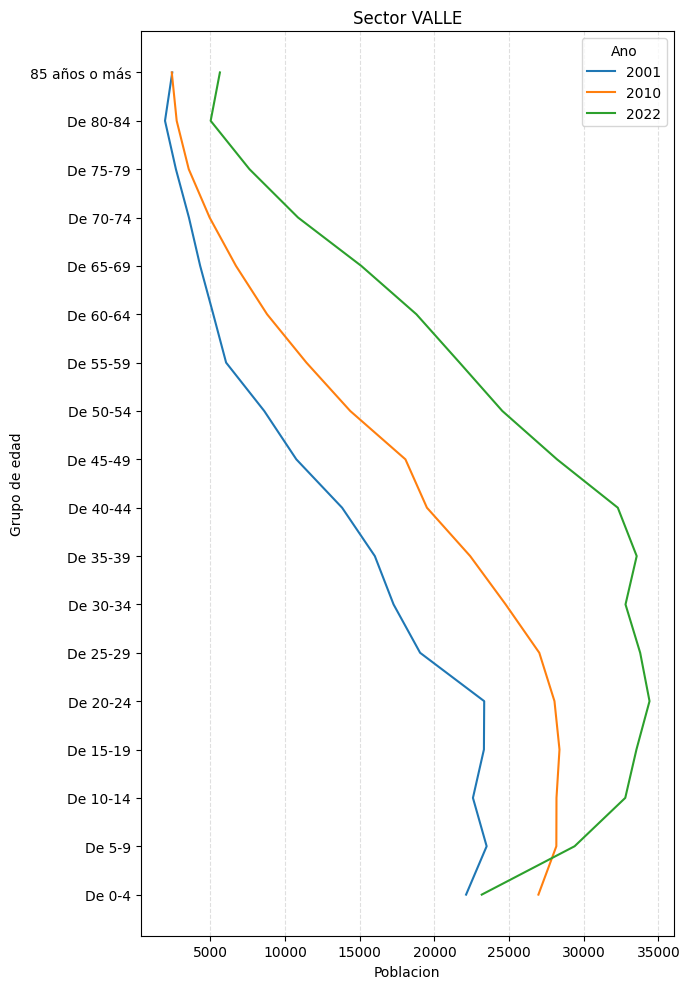

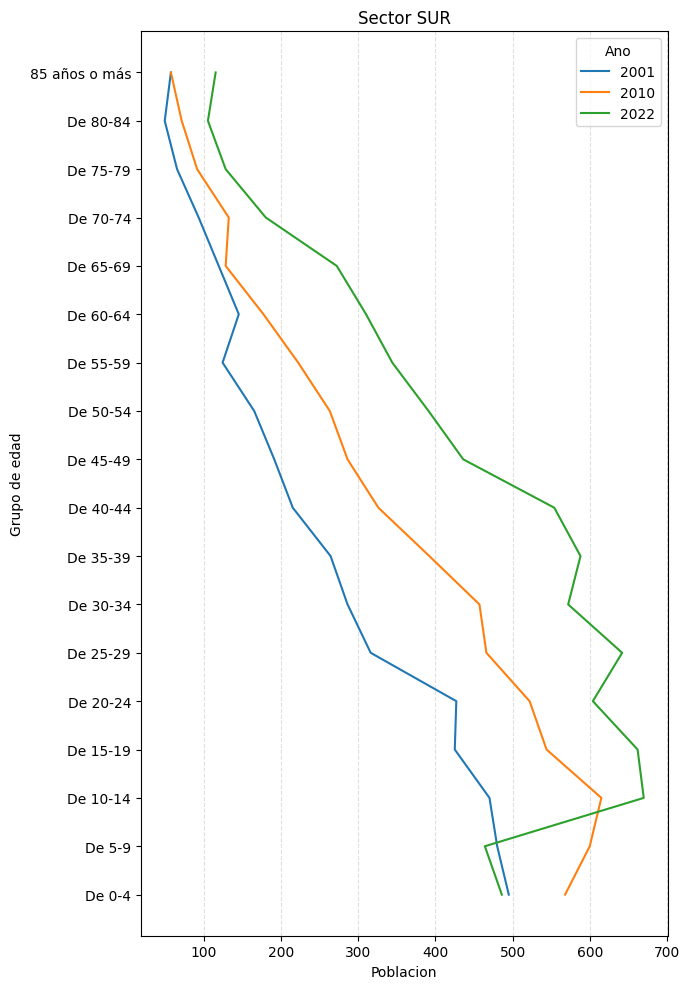

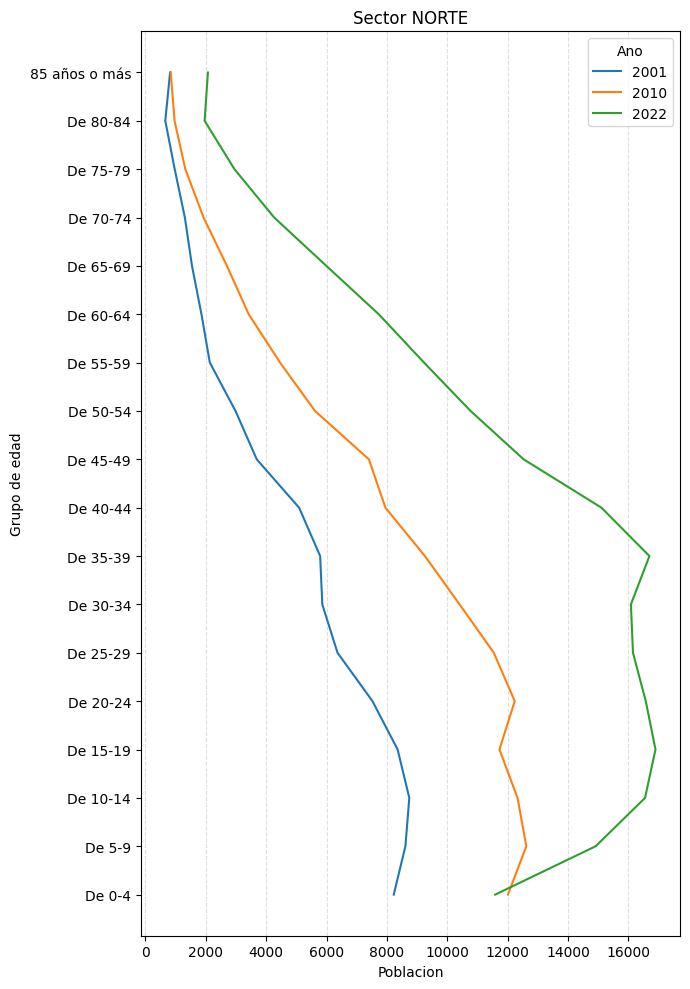

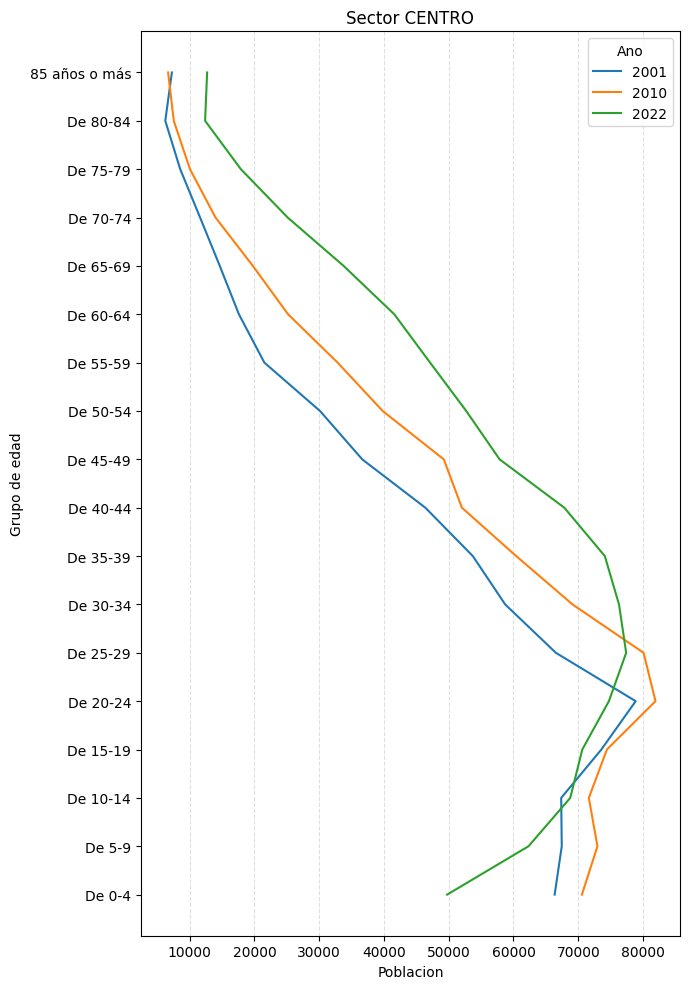

In [38]:
sectores = ["VALLE", "SUR", "NORTE", "CENTRO"]

for sector in sectores:
    datos = sector_grupo[sector_grupo["SECTOR"] == sector]
    if datos.empty:
        print(f"Sin datos para {sector}")
        continue
    serie = datos.set_index("Grupo Edad")[anios]

    fig, ax = plt.subplots(figsize=(7, 10))
    for col in anios:
        ax.plot(serie[col].values, serie.index, label=col)

    ax.set_title(f"Sector {sector}")
    ax.set_xlabel("Poblacion")
    ax.set_ylabel("Grupo de edad")
    ax.grid(axis="x", linestyle="--", alpha=0.4)
    ax.legend(title="Ano")
    plt.tight_layout()
    plt.show()


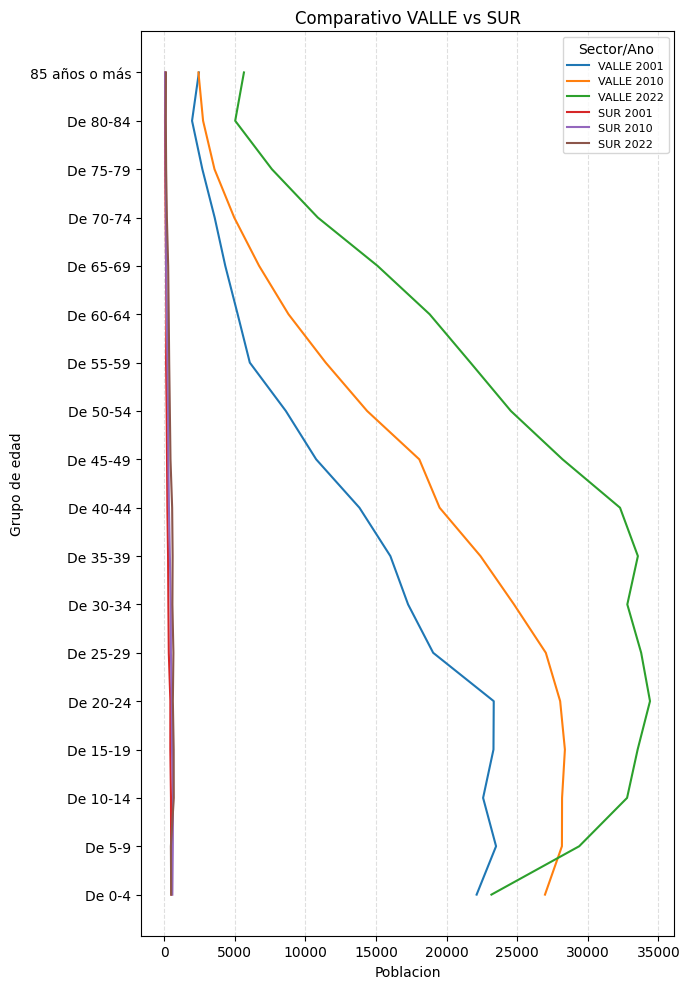

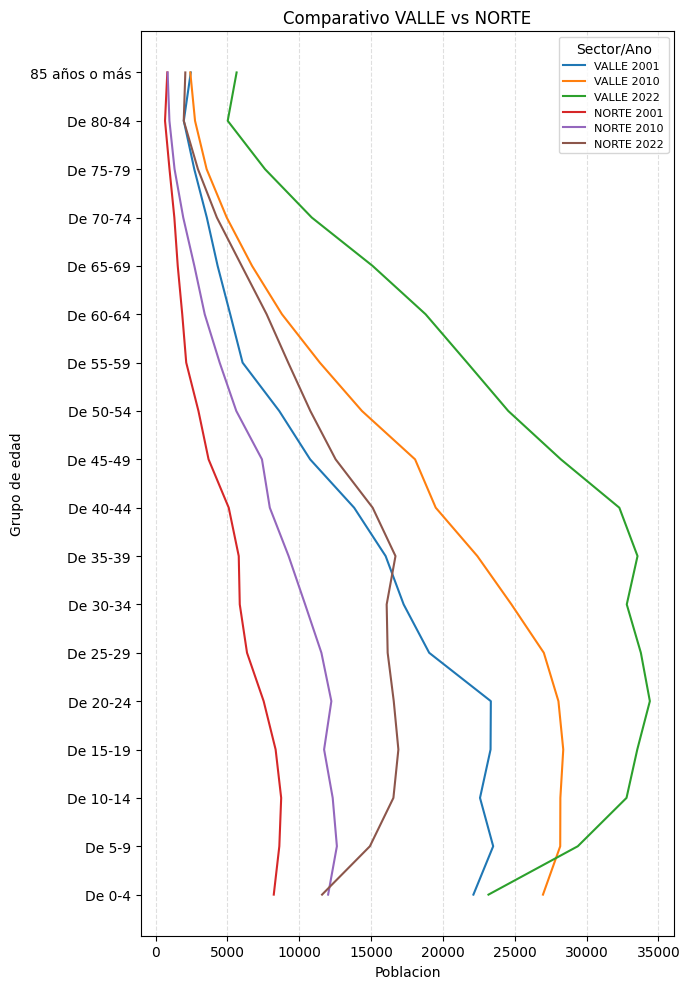

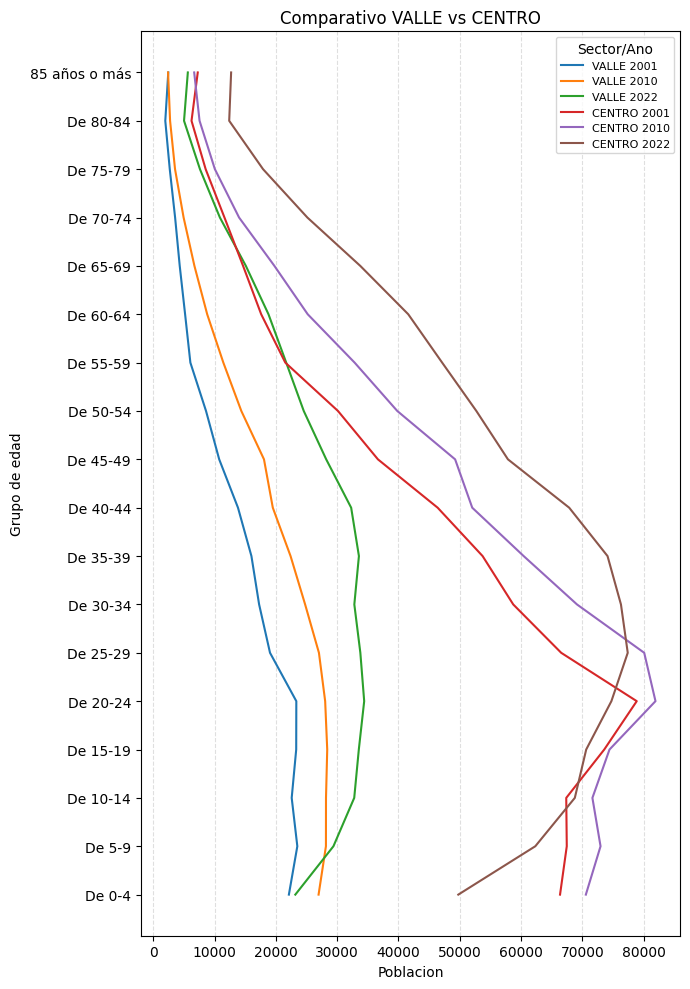

In [39]:
# Graficos comparativos: VALLE vs cada sector
base_sector = "VALLE"
sectores_comp = [s for s in ["SUR", "NORTE", "CENTRO"]]

for sector in sectores_comp:
    datos = sector_grupo[sector_grupo["SECTOR"].isin([base_sector, sector])]
    if datos.empty or datos["SECTOR"].nunique() < 2:
        print(f"Sin datos suficientes para {base_sector} vs {sector}")
        continue
    serie = datos.set_index(["SECTOR", "Grupo Edad"])[anios]

    fig, ax = plt.subplots(figsize=(7, 10))
    for s in [base_sector, sector]:
        for col in anios:
            valores = serie.loc[s][col].values
            ax.plot(valores, serie.loc[s].index, label=f"{s} {col}")

    ax.set_title(f"Comparativo {base_sector} vs {sector}")
    ax.set_xlabel("Poblacion")
    ax.set_ylabel("Grupo de edad")
    ax.grid(axis="x", linestyle="--", alpha=0.4)
    ax.legend(title="Sector/Ano", fontsize=8)
    plt.tight_layout()
    plt.show()
